In [43]:
import numpy as np
import pandas as pd
import csv
from fxpmath import Fxp
import matplotlib.pyplot as plt


In [2]:
x = Fxp(-3.25, True, 32, 16)
x.bin()

'11111111111111001100000000000000'

In [9]:
def multisimToMemory(input_filename, 
                     output_filename="out.txt", 
                     nsamples=10000,
                     channel='Y--Trace 1::[Channel A]'):
    df = pd.read_csv(input_filename)
    df=df.iloc[:nsamples]
    result=[]
    for n in df[channel]:
        result.append(Fxp(n, True, 32, 16).bin())
        
    file = open(output_filename,"w") 
    file.write("\n".join(result)) 
    file.close()

In [10]:
multisimToMemory(
                input_filename="datos_multisim/Sallen-Key 10kHz.csv",
                output_filename="in_ram.txt",
                nsamples=1000)

In [11]:
x = Fxp(1.5, True, 32, 16)
x.bin()

'00000000000000011000000000000000'

In [249]:
x = Fxp(-1.25, True, 32, 16)
x.bin()

'11111111111111101100000000000000'

In [13]:
len('11111111111111001100000000000000')

32

In [14]:
len("11111111111111001100000000000000")

32

In [23]:
11111111111111100100000000000000

11111111111111100100000000000000

In [106]:
x = Fxp('0b11111111111111001100000000000000', True, 32, 16)


In [107]:
x.real

-3.25

In [15]:
x = Fxp(1, True, 32, 16)
x.bin()

'00000000000000010000000000000000'

In [334]:
# params
# b =
#    0.36603   0.36603
# a =
#    1.00000  -0.26795
b0=Fxp(0.072960, True, 32, 16).bin()
b1=Fxp(0.072960, True, 32, 16).bin()
a=Fxp(-0.85408, True, 32, 16).bin()
offset=Fxp(0, True, 32, 16).bin()

print("offset_i=32'b"+offset+";")
print("b1_i=32'b"+b1+";")
print("b0_i=32'b"+b0+";")
print("a_i=32'b"+a+";")







offset_i=32'b00000000000000000000000000000000;
b1_i=32'b00000000000000000001001010101101;
b0_i=32'b00000000000000000001001010101101;
a_i=32'b11111111111111110010010101011100;


In [320]:
def arrayToMemory(array_in, 
                     output_filename="out.txt"):
    result=[]
    for n in array_in:
        result.append(Fxp(n, True, 32, 16).bin())
    file = open(output_filename,"w") 
    file.write("\n".join(result)) 
    file.close()
    
    
    
def genSamples(filename, freq, t):
#     sf=40e3*2*np.pi
    sf=40e3
    x = np.arange(0,t*sf)*(1/sf)
#     y = np.sin(x*freq*2*np.pi)
    y = np.sin(x*freq)
    arrayToMemory(y,filename)
    print(len(y))

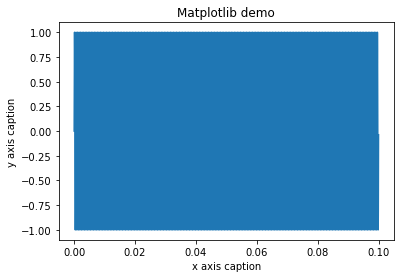

In [321]:
t=100e-3
sf=40e3*2*np.pi
freq=2e3


x = np.arange(0,t*sf)*(1/sf)
y = np.sin(x*freq*2*np.pi)


plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()


In [279]:
arrayToMemory(y,"generado_2k.txt")

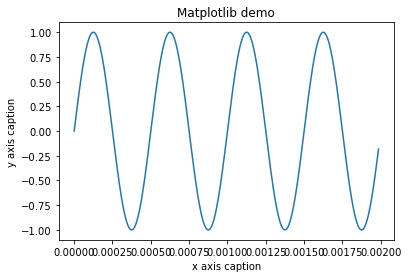

In [281]:
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x[:500],y[:500]) 
plt.show()

In [282]:
def readMem(filename, sample_freq=2e3):
    with open(filename) as f:
        content = f.readlines()
    content = [Fxp(x.strip(), True, 32, 16).real  for x in content[2:]] 
    x = np.arange(0,len(content))*(1/sample_freq)
    return (x,np.array(content))
              

In [283]:
print(Fxp(0.2, True, 32, 16).bin())
print(Fxp(-0.2, True, 32, 16).bin())

00000000000000000011001100110011
11111111111111111100110011001101


In [284]:
Fxp('32b11111111111111011000000000000000', True, 32, 16)

-2.5

In [288]:
x,y=readMem("respuesta 2K.txt",2e3)


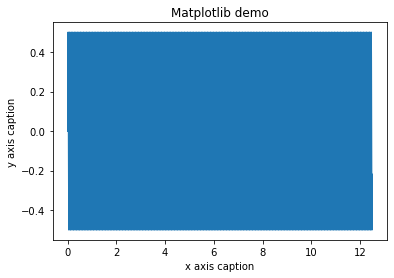

In [289]:
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()



In [228]:
Fxp("32b11111111111111111100110011001101", True, 32, 16).real

-0.1999969482421875

In [139]:
len("00000000000000000000011001100101")

32

In [272]:
r1= Fxp('32b11111111111111111111110101110001', True, 32, 16)
r2= Fxp('32b11111111111111111111010111000011', True, 32, 16)
r3= Fxp('32b11111111111111011000000000000000', True, 32, 16)
r4= Fxp('32b00000000000000101000000000000000', True, 32, 16)
r5= Fxp('32b00000000000000010100100000101111', True, 32, 16)

In [273]:
print(0.05*-0.2,r1)
print(0.2*-0.2,r2)
print(5*-0.5,r3)
print(5*0.5,r4)
print(-5*-0.2564,r5)

-0.010000000000000002 -0.0099945068359375
-0.04000000000000001 -0.0399932861328125
-2.5 -2.5
2.5 2.5
1.282 1.2819671630859375


In [322]:
genSamples("generado_1k.txt",1e3,100e-3)

4000


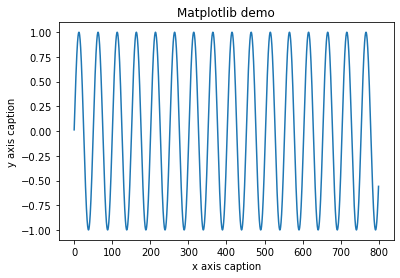

In [325]:
x,y=readMem("respuesta 1k.txt",5)
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

In [337]:
genSamples("generado_500.txt",500,100e-3)

4000


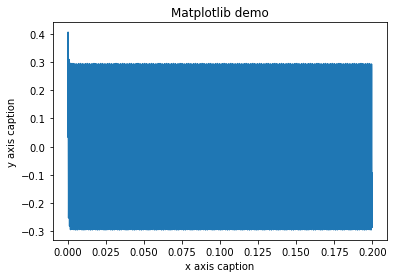

In [336]:
x,y=readMem("respuesta 20k.txt",20e3)
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()


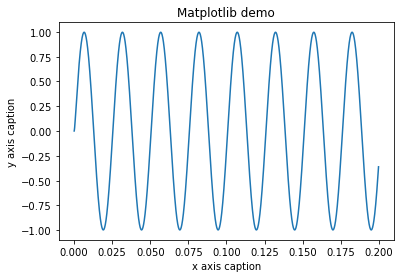

In [338]:
x,y=readMem("respuesta 500.txt",20e3)
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()
